<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r11_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r11-mal.csv?token=AKVFSOADPOURTSYC2SPSV7C6X3PZO"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r11-good.csv?token=AKVFSOG5SG623SCIS5JXL326X3PZS"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [113]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,860,0,3,1,1,4,3,9,1,1,27,11,18,4,4,1.0,20,1,1,1,1,1,0,1,4,72,3,27,9,0
1,868,4,0,2,1,4,3,9,27,11,29,13,18,3,0,0.0,4,1,1,1,1,1,0,2,8,144,6,27,18,0
2,928,0,1,3,1,4,3,9,29,13,27,11,18,3,3,1.0,16,1,1,1,1,1,0,3,12,216,9,27,27,0
3,938,0,3,1,1,4,3,9,0,0,27,11,19,5,5,1.0,24,1,1,1,1,1,0,1,4,76,3,27,9,0
4,946,4,0,2,1,4,3,10,27,11,29,13,19,3,0,0.0,4,1,1,1,1,1,0,2,8,152,6,30,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6116,2009035,4,0,6,5,3,3,9,27,11,29,13,11064,3,0,0.0,32,1,1,1,1,1,0,30,90,995760,18,27,54,0
6117,2009036,4,0,2,1,4,3,10,27,11,29,13,11065,3,0,0.0,32,1,1,1,1,1,0,2,8,88520,6,30,18,0
6118,2009037,4,0,7,1,4,3,11,27,11,0,0,11064,5,0,0.0,5,1,1,1,1,1,0,7,28,309792,21,33,63,0
6119,2009102,0,1,3,1,4,3,9,29,13,27,11,11065,3,3,1.0,20,1,1,1,1,1,0,3,12,132780,9,27,27,0


In [114]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,924,0,3,1,1,4,3,9,0,0,27,11,9,5,5,1.0,24,1,1,1,1,1,0,1,4,36,3,27,9,1
1,932,4,0,2,1,4,3,9,27,11,29,13,9,3,0,0.0,4,1,1,1,1,1,0,2,8,72,6,27,18,1
2,995,0,1,3,1,4,3,9,29,13,27,11,9,3,3,1.0,19,1,1,1,1,1,0,3,12,108,9,27,27,1
3,2246,0,3,1,1,4,3,9,0,0,27,11,22,5,5,1.0,24,1,1,1,1,1,0,1,4,88,3,27,9,1
4,2254,4,0,2,1,4,3,10,27,11,29,13,22,3,0,0.0,4,1,1,1,1,1,0,2,8,176,6,30,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,3250087,4,0,6,4,2,3,9,27,11,29,13,10012,3,0,0.0,25,1,1,1,1,1,0,24,48,480576,18,27,54,1
6412,3250094,4,0,6,5,3,3,9,27,11,29,13,10012,3,0,0.0,32,1,1,1,1,1,0,30,90,901080,18,27,54,1
6413,3250095,4,0,2,1,4,3,10,27,11,29,13,10013,3,0,0.0,32,1,1,1,1,1,0,2,8,80104,6,30,18,1
6414,3250096,4,0,7,1,4,3,11,27,11,0,0,10012,5,0,0.0,6,1,1,1,1,1,0,7,28,280336,21,33,63,1


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [116]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [118]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,860,0,3,1,1,4,3,9,1,1,27,11,18,4,4,1.0,20,1,1,1,1,1,0,1,4,72,3,27,9,0
1,868,4,0,2,1,4,3,9,27,11,29,13,18,3,0,0.0,4,1,1,1,1,1,0,2,8,144,6,27,18,0
2,924,0,3,1,1,4,3,9,0,0,27,11,9,5,5,1.0,24,1,1,1,1,1,0,1,4,36,3,27,9,1
3,928,0,1,3,1,4,3,9,29,13,27,11,18,3,3,1.0,16,1,1,1,1,1,0,3,12,216,9,27,27,0
4,932,4,0,2,1,4,3,9,27,11,29,13,9,3,0,0.0,4,1,1,1,1,1,0,2,8,72,6,27,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,3250087,4,0,6,4,2,3,9,27,11,29,13,10012,3,0,0.0,25,1,1,1,1,1,0,24,48,480576,18,27,54,1
12533,3250094,4,0,6,5,3,3,9,27,11,29,13,10012,3,0,0.0,32,1,1,1,1,1,0,30,90,901080,18,27,54,1
12534,3250095,4,0,2,1,4,3,10,27,11,29,13,10013,3,0,0.0,32,1,1,1,1,1,0,2,8,80104,6,30,18,1
12535,3250096,4,0,7,1,4,3,11,27,11,0,0,10012,5,0,0.0,6,1,1,1,1,1,0,7,28,280336,21,33,63,1


In [119]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,0.019332,-0.026430,0.044686,0.016778,-0.024476,NaN,0.016469,0.018011,0.009435,-0.023394,-0.033144,0.842515,0.031098,0.003105,-0.020195,0.019024,-0.180549,-0.180546,-0.214887,-0.179100,-0.150884,-0.050044,0.025543,0.020415,0.431297,0.044686,0.016469,0.044686,0.463465
outport,0.019332,1.000000,-0.904344,0.388540,-0.015365,0.022541,NaN,0.648044,0.822856,0.796342,-0.225870,-0.124965,0.019533,-0.613546,-0.935799,-0.996972,-0.583558,0.014749,0.077367,0.054819,0.060958,0.051403,-0.264285,0.132473,0.132979,0.109711,0.388540,0.648044,0.388540,0.005498
inport,-0.026430,-0.904344,1.000000,-0.315612,0.105028,-0.152721,NaN,-0.618761,-0.982948,-0.971822,0.300671,0.282645,-0.024091,0.828475,0.979129,0.924754,0.691346,-0.019478,-0.084856,-0.062090,-0.063390,-0.053717,0.534124,-0.041656,-0.075078,-0.069652,-0.315612,-0.618761,-0.315612,-0.007658
cache_coherence_type,0.044686,0.388540,-0.315612,1.000000,0.406440,-0.590337,NaN,0.058173,0.258385,0.241843,-0.297393,-0.247633,0.052416,-0.147382,-0.347850,-0.390648,-0.486889,0.024324,0.009863,0.020345,0.023837,0.021424,-0.145214,0.573269,0.458157,0.355496,1.000000,0.058173,1.000000,0.011978
flit_id,0.016778,-0.015365,0.105028,0.406440,1.000000,-0.115465,NaN,-0.124668,-0.143241,-0.152108,0.233021,0.226589,0.021540,0.057517,0.072768,0.020847,0.468971,0.025809,-0.008330,0.010402,0.016585,0.012268,0.074186,0.975021,0.936708,0.710227,0.406440,-0.124668,0.406440,0.004455
flit_type,-0.024476,0.022541,-0.152721,-0.590337,-0.115465,1.000000,NaN,0.181210,0.208209,0.221066,-0.338406,-0.328988,-0.031688,-0.083446,-0.105783,-0.030485,0.269346,-0.023058,0.052978,0.017805,0.003301,0.000485,-0.107589,-0.213248,0.049548,0.034855,-0.590337,0.181210,-0.590337,-0.006233
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.016469,0.648044,-0.618761,0.058173,-0.124668,0.181210,NaN,1.000000,0.564056,0.546189,-0.190731,-0.159308,0.016612,-0.471734,-0.639554,-0.656899,-0.315294,0.013536,0.057343,0.042180,0.034823,0.025252,-0.308850,-0.044334,-0.012116,-0.002475,0.058173,1.000000,0.058173,0.003109
src_ni,0.018011,0.822856,-0.982948,0.258385,-0.143241,0.208209,NaN,0.564056,1.000000,0.998246,-0.291159,-0.288111,0.020112,-0.852639,-0.940911,-0.845973,-0.702789,0.015359,0.083080,0.058581,0.057644,0.048572,-0.539814,-0.006691,0.041095,0.042676,0.258385,0.564056,0.258385,-0.004565
src_router,0.009435,0.796342,-0.971822,0.241843,-0.152108,0.221066,NaN,0.546189,0.998246,1.000000,-0.286722,-0.287529,0.018908,-0.861448,-0.929133,-0.820380,-0.703673,0.015888,0.082816,0.058739,0.056941,0.047964,-0.537558,-0.019101,0.032049,0.035442,0.241843,0.546189,0.241843,-0.021258


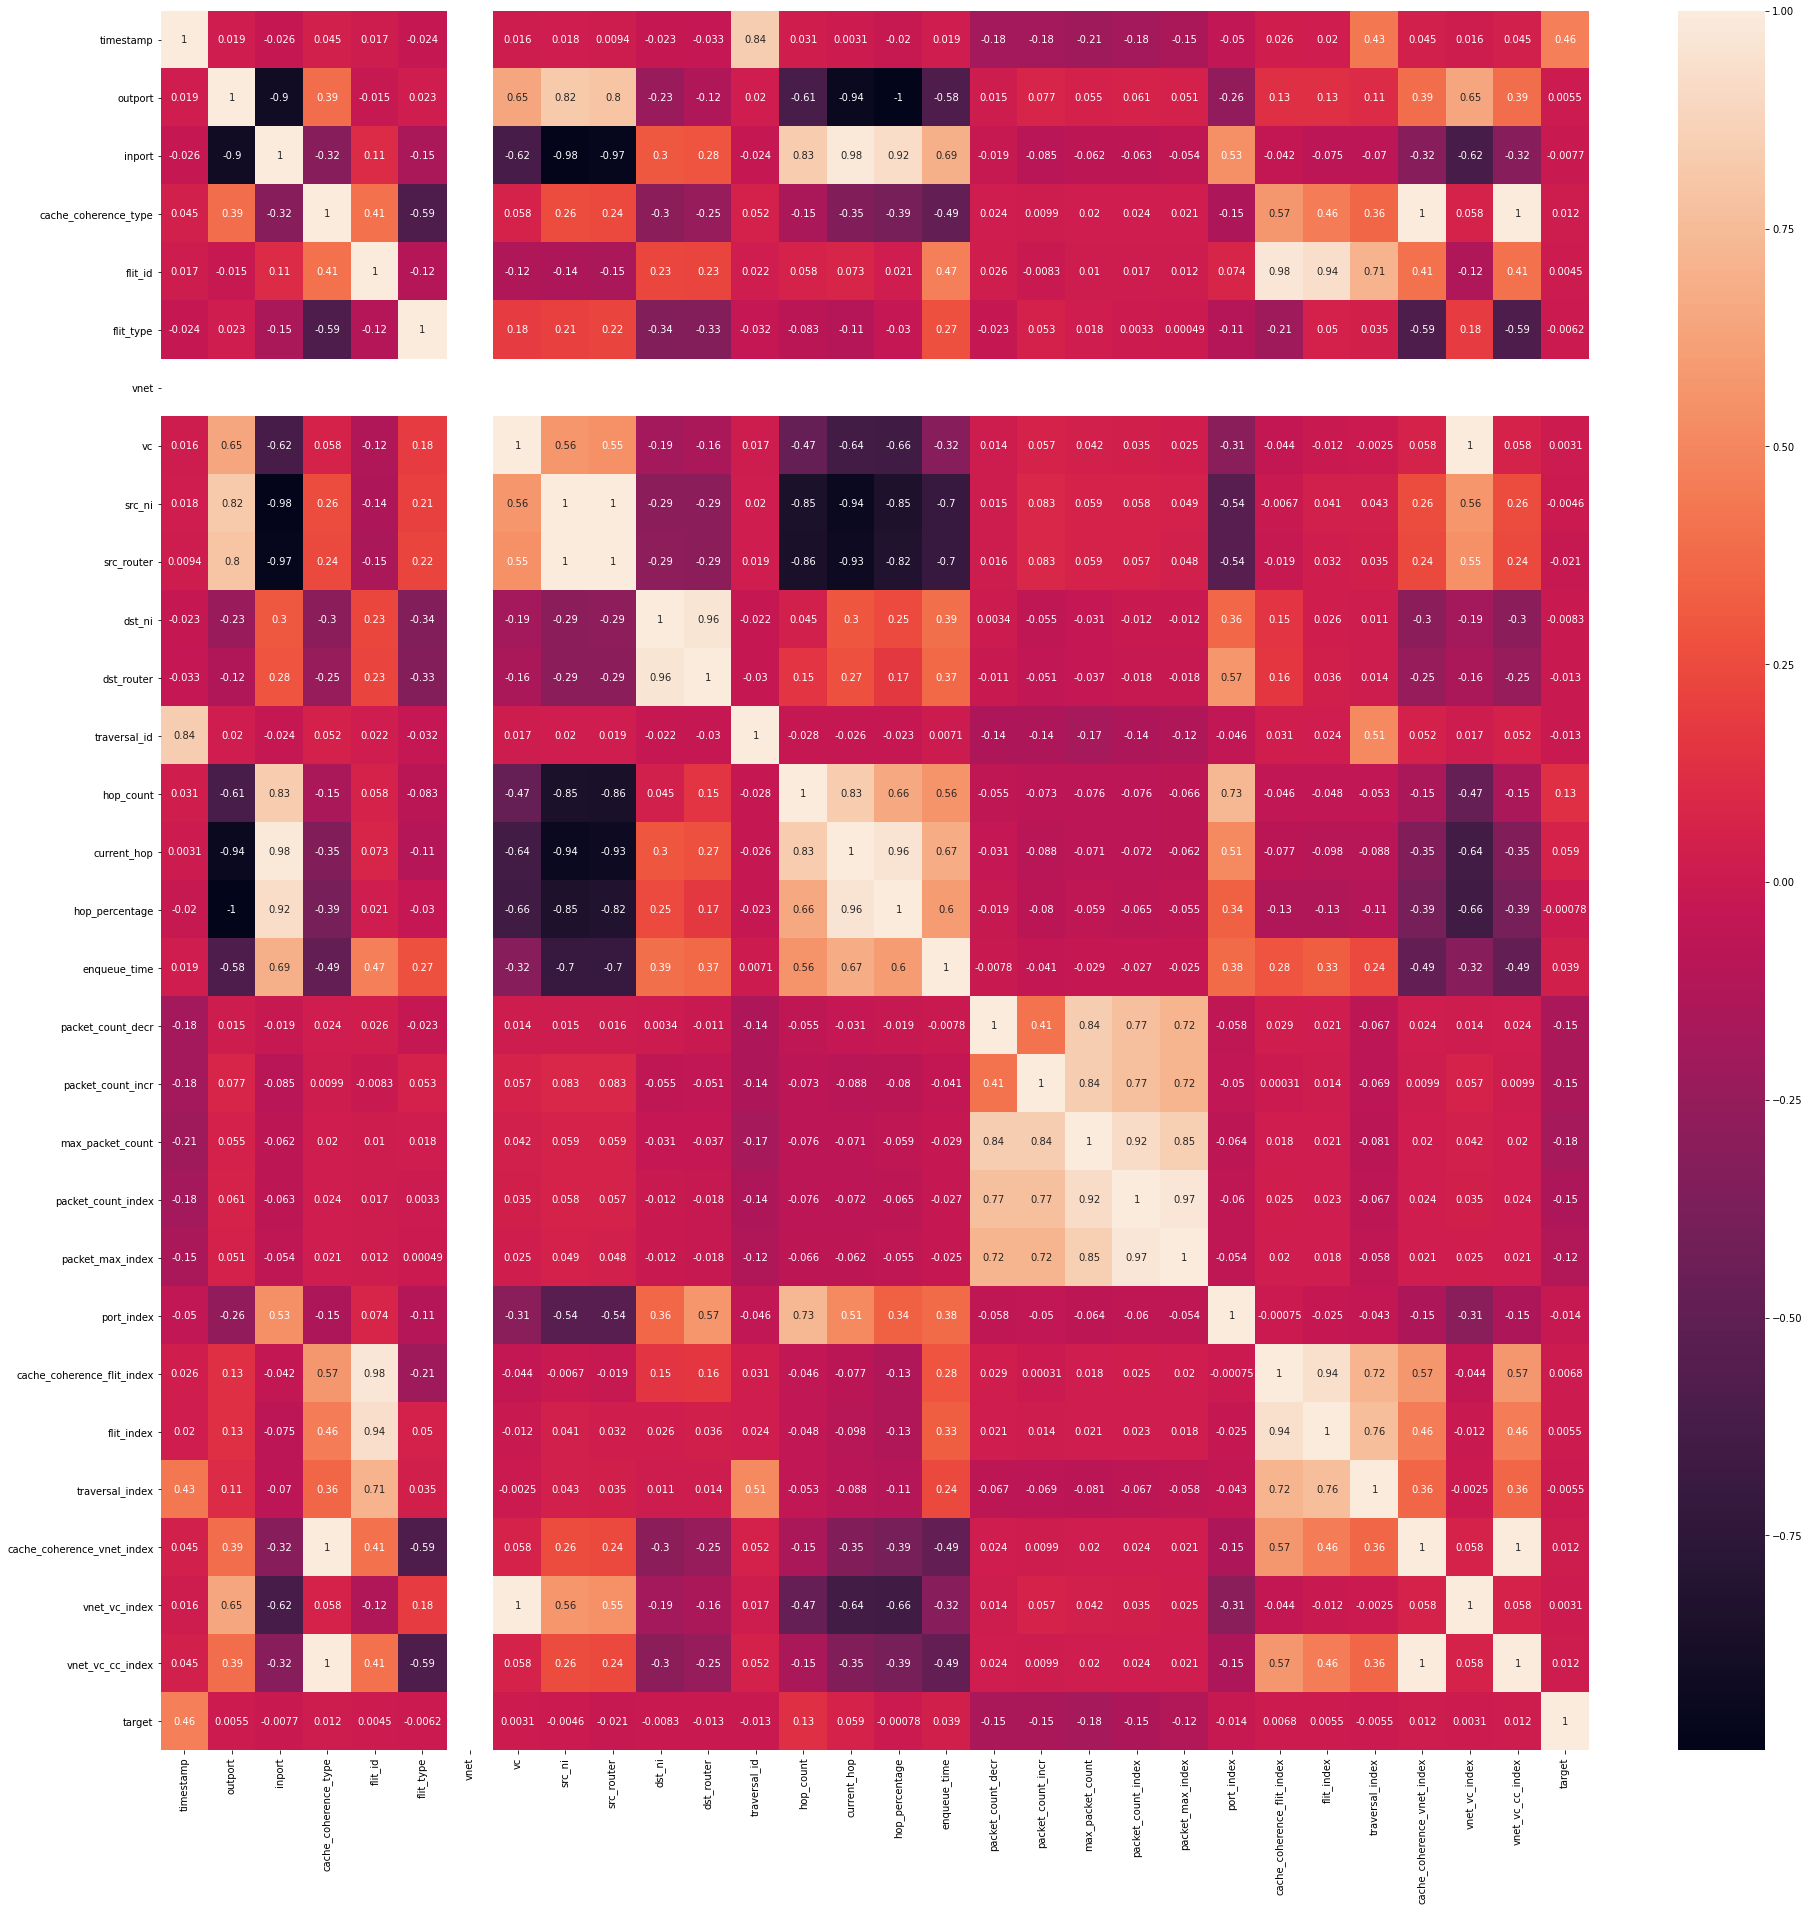

In [120]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [121]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0,3,1,1,4,3,9,27,11,18,4,4,1.0,20,1,1,1,1,1,0,1,4,72,3,27,9
1,4,0,2,1,4,3,9,29,13,18,3,0,0.0,4,1,1,1,1,1,0,2,8,144,6,27,18
2,0,3,1,1,4,3,9,27,11,9,5,5,1.0,24,1,1,1,1,1,0,1,4,36,3,27,9
3,0,1,3,1,4,3,9,27,11,18,3,3,1.0,16,1,1,1,1,1,0,3,12,216,9,27,27
4,4,0,2,1,4,3,9,29,13,9,3,0,0.0,4,1,1,1,1,1,0,2,8,72,6,27,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,4,0,6,4,2,3,9,29,13,10012,3,0,0.0,25,1,1,1,1,1,0,24,48,480576,18,27,54
12533,4,0,6,5,3,3,9,29,13,10012,3,0,0.0,32,1,1,1,1,1,0,30,90,901080,18,27,54
12534,4,0,2,1,4,3,10,29,13,10013,3,0,0.0,32,1,1,1,1,1,0,2,8,80104,6,30,18
12535,4,0,7,1,4,3,11,0,0,10012,5,0,0.0,6,1,1,1,1,1,0,7,28,280336,21,33,63


In [122]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.0,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.870968,0.733333,0.000813,0.333333,0.8,1.0,0.326531,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000036,0.000000,0.000000,0.000000
1,1.0,0.000000,0.166667,0.00,1.000000,0.0,0.000000,0.935484,0.866667,0.000813,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000108,0.166667,0.000000,0.166667
2,0.0,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.870968,0.733333,0.000000,0.666667,1.0,1.0,0.408163,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.333333,0.333333,0.00,1.000000,0.0,0.000000,0.870968,0.733333,0.000813,0.000000,0.6,1.0,0.244898,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000181,0.333333,0.000000,0.333333
4,1.0,0.000000,0.166667,0.00,1.000000,0.0,0.000000,0.935484,0.866667,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000036,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12532,1.0,0.000000,0.833333,0.75,0.333333,0.0,0.000000,0.935484,0.866667,0.903532,0.000000,0.0,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.482604,0.833333,0.000000,0.833333
12533,1.0,0.000000,0.833333,1.00,0.666667,0.0,0.000000,0.935484,0.866667,0.903532,0.000000,0.0,0.0,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.904913,0.833333,0.000000,0.833333
12534,1.0,0.000000,0.166667,0.00,1.000000,0.0,0.333333,0.935484,0.866667,0.903622,0.000000,0.0,0.0,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.080412,0.166667,0.333333,0.166667
12535,1.0,0.000000,1.000000,0.00,1.000000,0.0,0.666667,0.000000,0.000000,0.903532,0.666667,0.0,0.0,0.040816,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.281504,1.000000,0.666667,1.000000


In [123]:
train_X[train_X.duplicated()].shape

(32, 26)

In [124]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.904344,0.388540,-0.015365,0.022541,NaN,0.648044,-0.225870,-0.124965,0.019533,-0.613546,-0.935799,-0.996972,-0.583558,0.014749,0.077367,0.054819,0.060958,0.051403,-0.264285,0.132473,0.132979,0.109711,0.388540,0.648044,0.388540,0.005498
inport,-0.904344,1.000000,-0.315612,0.105028,-0.152721,NaN,-0.618761,0.300671,0.282645,-0.024091,0.828475,0.979129,0.924754,0.691346,-0.019478,-0.084856,-0.062090,-0.063390,-0.053717,0.534124,-0.041656,-0.075078,-0.069652,-0.315612,-0.618761,-0.315612,-0.007658
cache_coherence_type,0.388540,-0.315612,1.000000,0.406440,-0.590337,NaN,0.058173,-0.297393,-0.247633,0.052416,-0.147382,-0.347850,-0.390648,-0.486889,0.024324,0.009863,0.020345,0.023837,0.021424,-0.145214,0.573269,0.458157,0.355496,1.000000,0.058173,1.000000,0.011978
flit_id,-0.015365,0.105028,0.406440,1.000000,-0.115465,NaN,-0.124668,0.233021,0.226589,0.021540,0.057517,0.072768,0.020847,0.468971,0.025809,-0.008330,0.010402,0.016585,0.012268,0.074186,0.975021,0.936708,0.710227,0.406440,-0.124668,0.406440,0.004455
flit_type,0.022541,-0.152721,-0.590337,-0.115465,1.000000,NaN,0.181210,-0.338406,-0.328988,-0.031688,-0.083446,-0.105783,-0.030485,0.269346,-0.023058,0.052978,0.017805,0.003301,0.000485,-0.107589,-0.213248,0.049548,0.034855,-0.590337,0.181210,-0.590337,-0.006233
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.648044,-0.618761,0.058173,-0.124668,0.181210,NaN,1.000000,-0.190731,-0.159308,0.016612,-0.471734,-0.639554,-0.656899,-0.315294,0.013536,0.057343,0.042180,0.034823,0.025252,-0.308850,-0.044334,-0.012116,-0.002475,0.058173,1.000000,0.058173,0.003109
dst_ni,-0.225870,0.300671,-0.297393,0.233021,-0.338406,NaN,-0.190731,1.000000,0.961224,-0.021957,0.044674,0.297737,0.249020,0.391797,0.003362,-0.055023,-0.030743,-0.012284,-0.011821,0.363547,0.154341,0.025989,0.010857,-0.297393,-0.190731,-0.297393,-0.008282
dst_router,-0.124965,0.282645,-0.247633,0.226589,-0.328988,NaN,-0.159308,0.961224,1.000000,-0.029660,0.152965,0.268912,0.166523,0.368515,-0.010900,-0.050729,-0.036675,-0.018336,-0.017713,0.567675,0.157546,0.036157,0.014173,-0.247633,-0.159308,-0.247633,-0.012774
traversal_id,0.019533,-0.024091,0.052416,0.021540,-0.031688,NaN,0.016612,-0.021957,-0.029660,1.000000,-0.028363,-0.026041,-0.022647,0.007105,-0.143626,-0.143618,-0.170939,-0.144406,-0.124371,-0.046014,0.031129,0.024471,0.511367,0.052416,0.016612,0.052416,-0.012595


Principal Component Analysis

In [125]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.68656979,  1.22070567,  0.34464803, ..., -0.16387463,
         0.31197314,  0.39736378],
       [ 1.07267562,  1.06959748,  0.16674115, ..., -0.396766  ,
         0.92805412,  0.26062855],
       [-0.88974515,  1.18502042,  0.32736365, ..., -0.00494557,
         0.25857913,  0.4155181 ],
       ...,
       [ 1.10884505,  1.04387719,  0.51879568, ..., -0.25163607,
         0.33110483, -0.50791211],
       [ 1.54936071,  0.21897614, -0.30714935, ...,  1.45570076,
        -0.00657952, -0.31375253],
       [-0.08494644,  0.86457087,  0.22178194, ..., -0.13130205,
         0.30147566, -0.47370414]])

In [126]:
pca.explained_variance_ratio_

array([0.47101608, 0.18463111, 0.09795907, 0.09060627, 0.04804331,
       0.04110767, 0.03782815])

Text(0, 0.5, 'Variance')

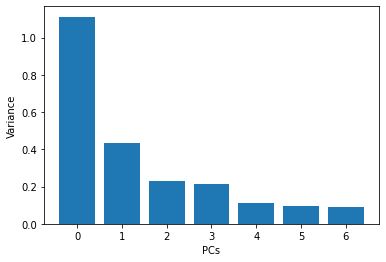

In [127]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [128]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,-0.686570,1.220706,0.344648,-0.461386,-0.163875,0.311973,0.397364
1,1.072676,1.069597,0.166741,0.065499,-0.396766,0.928054,0.260629
2,-0.889745,1.185020,0.327364,-0.377026,-0.004946,0.258579,0.415518
3,-0.079545,0.922906,0.153104,-0.608881,-0.199514,0.476723,0.391877
4,1.072667,1.069637,0.166714,0.065533,-0.396827,0.928205,0.261398
...,...,...,...,...,...,...,...
12532,1.229636,-0.729036,0.072711,-0.145075,-0.336708,0.419867,-0.510244
12533,1.230551,-1.139173,0.632547,-0.152344,-0.167436,0.551188,-0.580311
12534,1.108845,1.043877,0.518796,0.207957,-0.251636,0.331105,-0.507912
12535,1.549361,0.218976,-0.307149,-0.059066,1.455701,-0.006580,-0.313753


In [129]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,-1.672567e-16,9.111087e-17,-1.536261e-15,9.722336e-16,-6.339020e-15,1.435134e-15,-0.022131
1,-1.672567e-16,1.000000e+00,-1.204424e-15,3.823858e-16,1.879031e-15,6.600565e-16,-6.619677e-17,-0.014738
2,9.111087e-17,-1.204424e-15,1.000000e+00,6.317264e-16,1.249186e-15,-4.752509e-16,1.301715e-16,-0.008818
3,-1.536261e-15,3.823858e-16,6.317264e-16,1.000000e+00,-4.709967e-16,-2.400455e-15,6.656005e-16,0.017043
4,9.722336e-16,1.879031e-15,1.249186e-15,-4.709967e-16,1.000000e+00,-5.480751e-16,8.012356e-16,0.078362
5,-6.339020e-15,6.600565e-16,-4.752509e-16,-2.400455e-15,-5.480751e-16,1.000000e+00,4.558128e-16,-0.030151
6,1.435134e-15,-6.619677e-17,1.301715e-16,6.656005e-16,8.012356e-16,4.558128e-16,1.000000e+00,0.017215
target,-2.213077e-02,-1.473845e-02,-8.817665e-03,1.704342e-02,7.836224e-02,-3.015120e-02,1.721542e-02,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

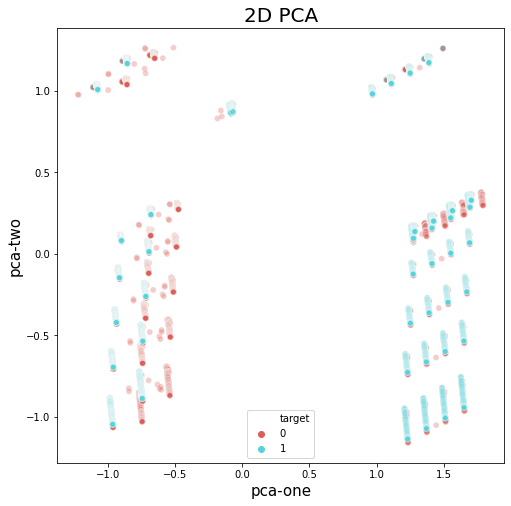

In [131]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

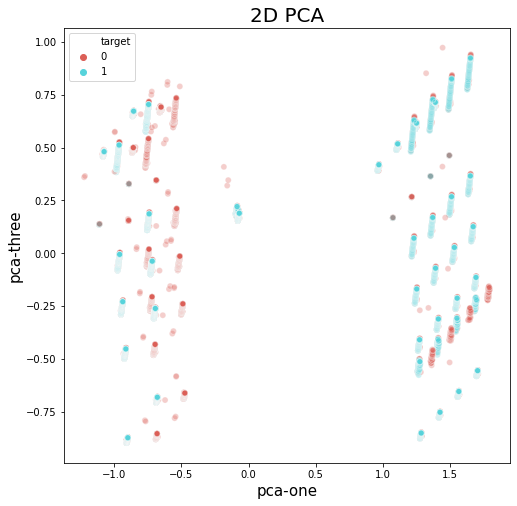

In [132]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

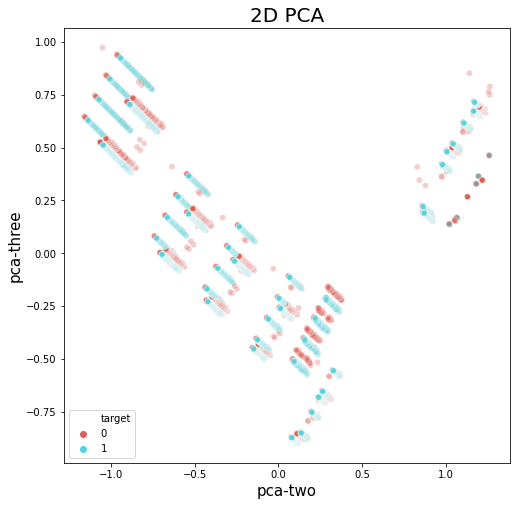

In [133]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

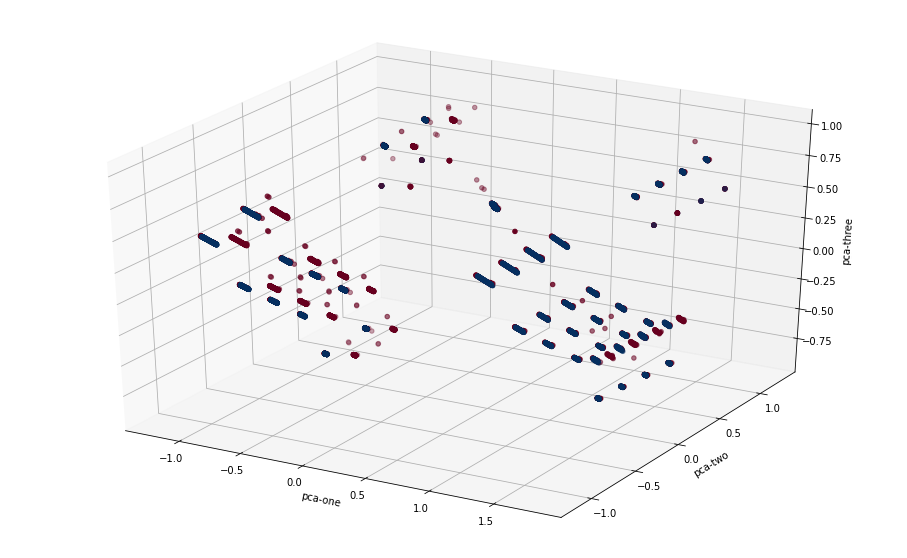

In [134]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

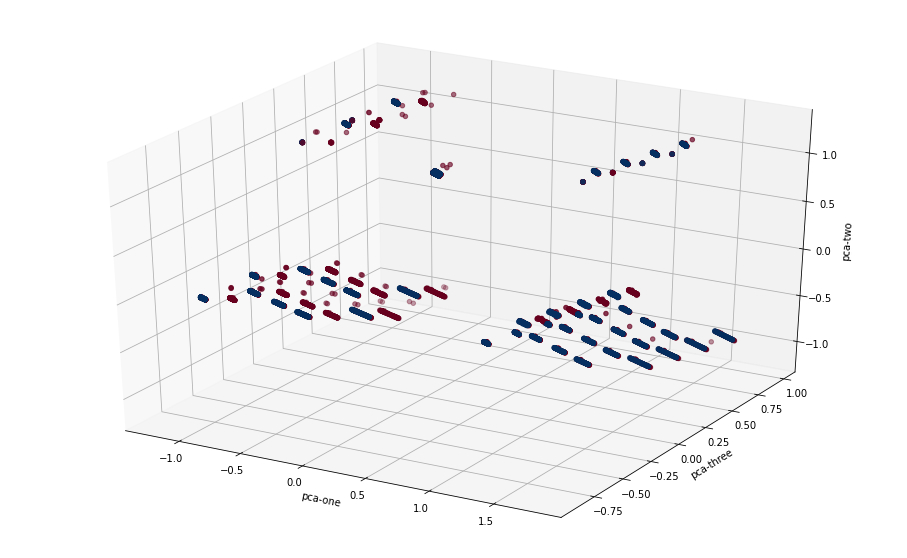

In [135]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

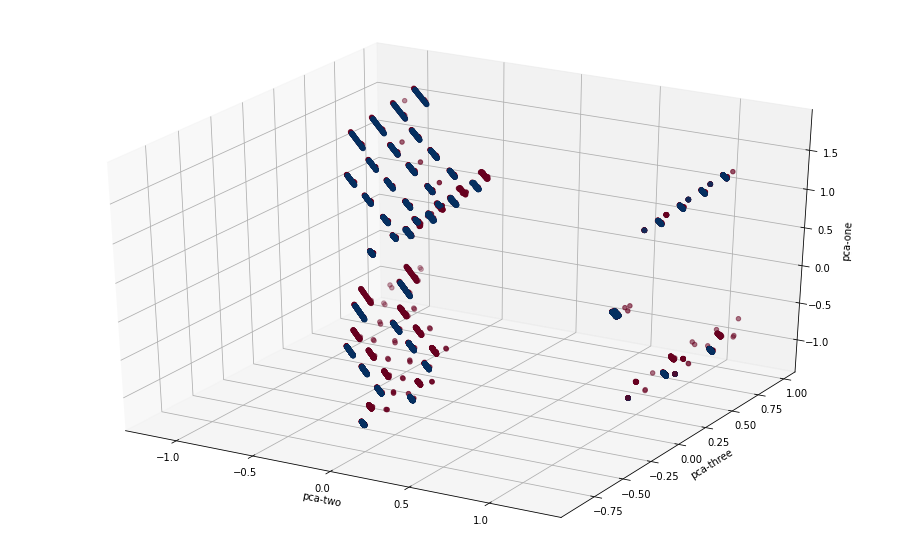

In [136]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [137]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 30.94084358215332 seconds


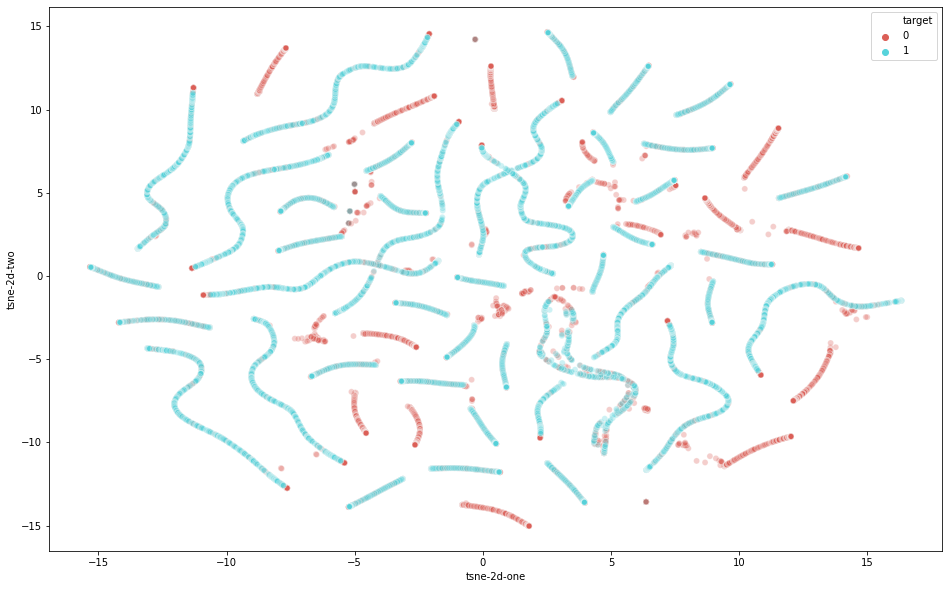

In [138]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

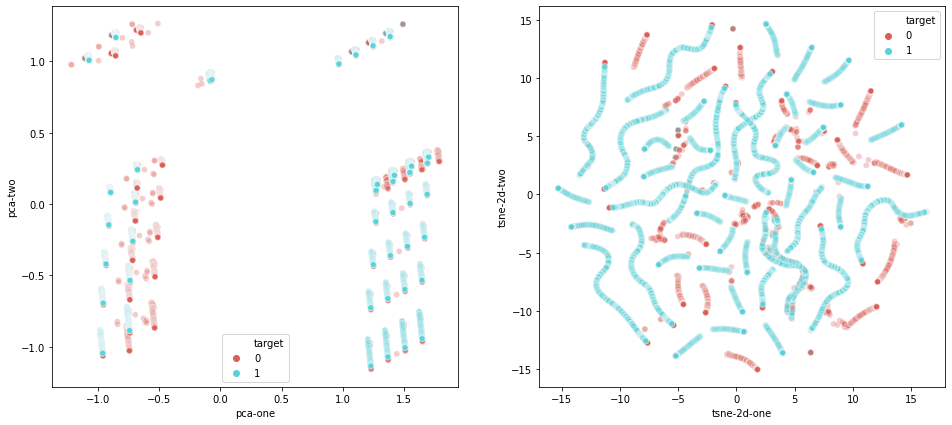

In [139]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [140]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 30.634108543395996 seconds


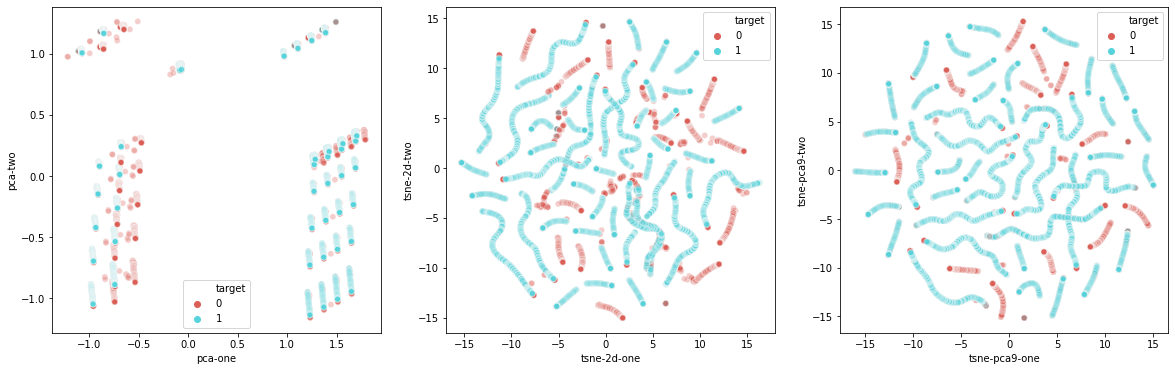

In [141]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [143]:
train_Y = df['target']
train_Y.value_counts()

1    6416
0    6121
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs       Score
16            max_packet_count  174.806738
15           packet_count_incr   88.216575
14           packet_count_decr   86.590163
17          packet_count_index   83.168193
10                   hop_count   56.999413
18            packet_max_index   56.328314
11                 current_hop   14.250728
13                enqueue_time    3.872066
19                  port_index    1.147522
9                 traversal_id    0.490103
3                      flit_id    0.412050
20  cache_coherence_flit_index    0.272131
21                  flit_index    0.239006
2         cache_coherence_type    0.080965
23  cache_coherence_vnet_index    0.080965
25            vnet_vc_cc_index    0.080965
12              hop_percentage    0.074789


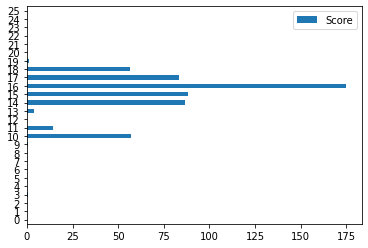

In [146]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [149]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 70.29614119054742
Test Prediction  70.01594896331738


In [151]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
10,hop_count,12.381375
11,current_hop,5.519787
7,dst_ni,5.412858
8,dst_router,3.211449
12,hop_percentage,1.585471
13,enqueue_time,1.291323
2,cache_coherence_type,0.381634
23,cache_coherence_vnet_index,0.381634
25,vnet_vc_cc_index,0.381634
21,flit_index,0.197817


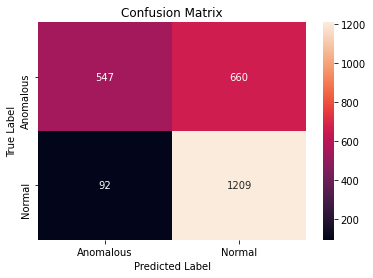

In [152]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.45      0.59      1207
           1       0.65      0.93      0.76      1301

    accuracy                           0.70      2508
   macro avg       0.75      0.69      0.68      2508
weighted avg       0.75      0.70      0.68      2508



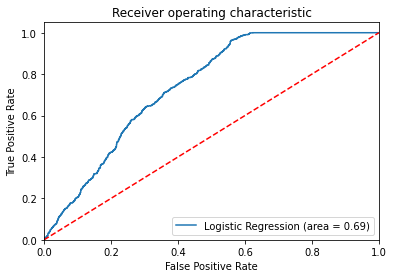

In [154]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [155]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [157]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 77.73456974773157
Test Prediction  66.74641148325358


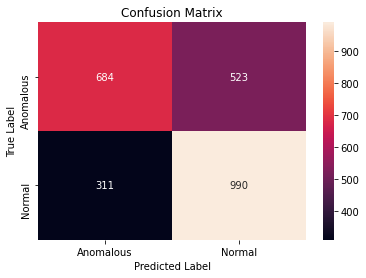

In [158]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [159]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62      1207
           1       0.65      0.76      0.70      1301

    accuracy                           0.67      2508
   macro avg       0.67      0.66      0.66      2508
weighted avg       0.67      0.67      0.66      2508



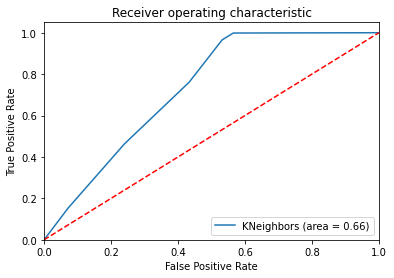

In [160]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [162]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [164]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 54.70136603848839
Test Prediction Score 55.50239234449761


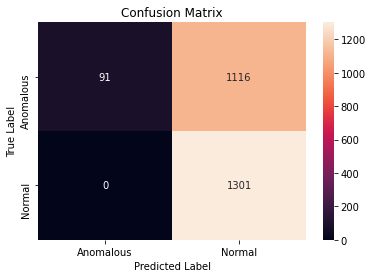

In [165]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [166]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.08      0.14      1207
           1       0.54      1.00      0.70      1301

    accuracy                           0.56      2508
   macro avg       0.77      0.54      0.42      2508
weighted avg       0.76      0.56      0.43      2508



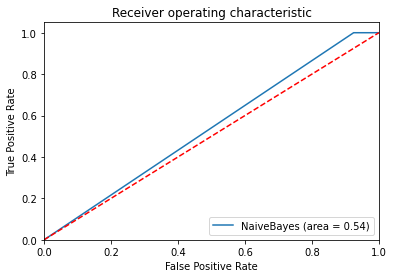

In [167]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [169]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 8023 samples, validate on 2006 samples
Epoch 1/10
8023/8023 [==============================] - 0s 51us/step - loss: 0.2512 - accuracy: 0.4900 - val_loss: 0.2500 - val_accuracy: 0.5020
Epoch 2/10
8023/8023 [==============================] - 0s 44us/step - loss: 0.2500 - accuracy: 0.5085 - val_loss: 0.2499 - val_accuracy: 0.5115
Epoch 3/10
8023/8023 [==============================] - 0s 40us/step - loss: 0.2499 - accuracy: 0.5107 - val_loss: 0.2499 - val_accuracy: 0.5120
Epoch 4/10
8023/8023 [==============================] - 0s 37us/step - loss: 0.2499 - accuracy: 0.5122 - val_loss: 0.2498 - val_accuracy: 0.5130
Epoch 5/10
8023/8023 [==============================] - 0s 38us/step - loss: 0.2497 - accuracy: 0.5159 - val_loss: 0.2494 - val_accuracy: 0.5214
Epoch 6/10
8023/8023 [==============================] - 0s 37us/step - loss: 0.2481 - accuracy: 0.5311 - val_loss: 0.2467 - val_accuracy: 0.5374
Epoch 7/10
8023/8023 [==============================] - 0s 39us/step - loss: 0.245

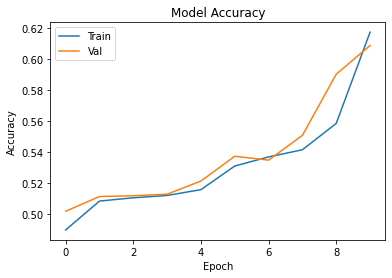

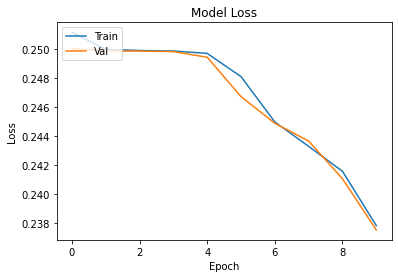

In [170]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [171]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 61.40%


3-Layer Neural Network

In [172]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 8023 samples, validate on 2006 samples
Epoch 1/15
8023/8023 [==============================] - 0s 47us/step - loss: 0.2608 - accuracy: 0.4976 - val_loss: 0.2536 - val_accuracy: 0.4950
Epoch 2/15
8023/8023 [==============================] - 0s 37us/step - loss: 0.2526 - accuracy: 0.4953 - val_loss: 0.2506 - val_accuracy: 0.4985
Epoch 3/15
8023/8023 [==============================] - 0s 39us/step - loss: 0.2509 - accuracy: 0.4978 - val_loss: 0.2501 - val_accuracy: 0.5045
Epoch 4/15
8023/8023 [==============================] - 0s 39us/step - loss: 0.2504 - accuracy: 0.5016 - val_loss: 0.2499 - val_accuracy: 0.5060
Epoch 5/15
8023/8023 [==============================] - 0s 44us/step - loss: 0.2502 - accuracy: 0.4997 - val_loss: 0.2499 - val_accuracy: 0.5030
Epoch 6/15
8023/8023 [==============================] - 0s 42us/step - loss: 0.2501 - accuracy: 0.5042 - val_loss: 0.2498 - val_accuracy: 0.5010
Epoch 7/15
8023/8023 [==============================] - 0s 39us/step - loss: 0.249

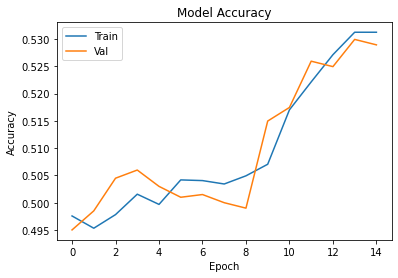

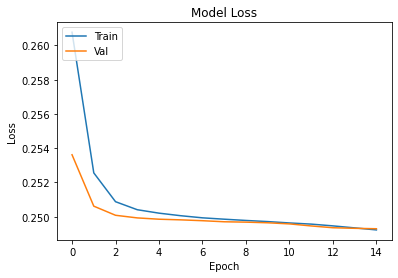

In [173]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [174]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 51.52%


4-Layer Neural Network



In [175]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 8023 samples, validate on 2006 samples
Epoch 1/30
8023/8023 [==============================] - 0s 47us/step - loss: 0.2536 - accuracy: 0.5105 - val_loss: 0.2520 - val_accuracy: 0.4831
Epoch 2/30
8023/8023 [==============================] - 0s 38us/step - loss: 0.2503 - accuracy: 0.5098 - val_loss: 0.2513 - val_accuracy: 0.4935
Epoch 3/30
8023/8023 [==============================] - 0s 40us/step - loss: 0.2498 - accuracy: 0.5183 - val_loss: 0.2509 - val_accuracy: 0.4990
Epoch 4/30
8023/8023 [==============================] - 0s 37us/step - loss: 0.2495 - accuracy: 0.5222 - val_loss: 0.2506 - val_accuracy: 0.5015
Epoch 5/30
8023/8023 [==============================] - 0s 38us/step - loss: 0.2492 - accuracy: 0.5231 - val_loss: 0.2504 - val_accuracy: 0.5080
Epoch 6/30
8023/8023 [==============================] - 0s 39us/step - loss: 0.2489 - accuracy: 0.5266 - val_loss: 0.2502 - val_accuracy: 0.5145
Epoch 7/30
8023/8023 [==============================] - 0s 39us/step - loss: 0.248

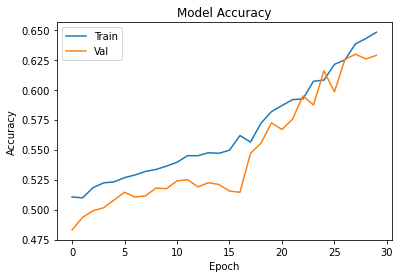

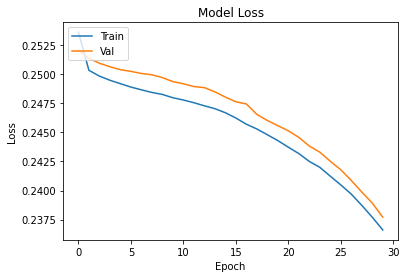

In [176]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [177]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.72%


5-Layer Neural Network Optimized

In [178]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 8023 samples, validate on 2006 samples
Epoch 1/100
8023/8023 [==============================] - 1s 150us/step - loss: 0.2213 - accuracy: 0.6201 - val_loss: 0.2329 - val_accuracy: 0.6281
Epoch 2/100
8023/8023 [==============================] - 1s 73us/step - loss: 0.1972 - accuracy: 0.6784 - val_loss: 0.1963 - val_accuracy: 0.6874
Epoch 3/100
8023/8023 [==============================] - 1s 71us/step - loss: 0.1923 - accuracy: 0.6857 - val_loss: 0.2344 - val_accuracy: 0.5902
Epoch 4/100
8023/8023 [==============================] - 1s 80us/step - loss: 0.1906 - accuracy: 0.6923 - val_loss: 0.1911 - val_accuracy: 0.6820
Epoch 5/100
8023/8023 [==============================] - 1s 73us/step - loss: 0.1900 - accuracy: 0.6885 - val_loss: 0.2798 - val_accuracy: 0.5434
Epoch 6/100
8023/8023 [==============================] - 1s 75us/step - loss: 0.1890 - accuracy: 0.6888 - val_loss: 0.2052 - val_accuracy: 0.6476
Epoch 7/100
8023/8023 [==============================] - 1s 72us/step - los

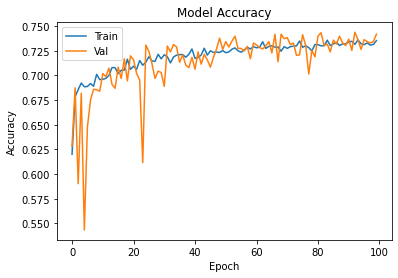

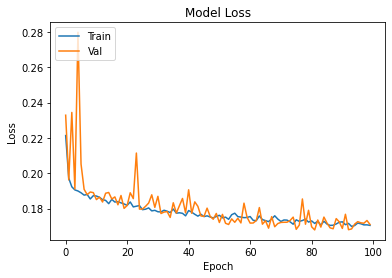

In [179]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [180]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.60%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [182]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.8327849237212085


In [183]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [185]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.99162428956028
Test Prediction Score 90.07177033492823


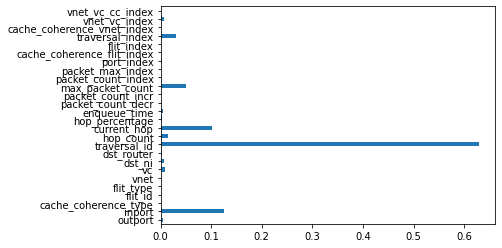

In [186]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

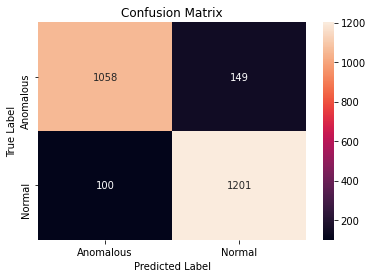

In [187]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [188]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1207
           1       0.89      0.92      0.91      1301

    accuracy                           0.90      2508
   macro avg       0.90      0.90      0.90      2508
weighted avg       0.90      0.90      0.90      2508



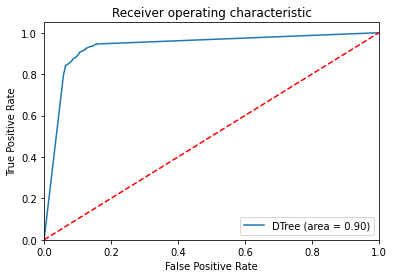

In [189]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250],
#            'max_features':range(0,25,2)}
#dt_g=RandomForestClassifier(random_state=42)
#dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
#dt_cv.fit(X_train,y_train)

#print("Best parameters:",dt_cv.best_params_)
#print("Accuracy :",dt_cv.best_score_)

In [192]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [194]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.59118556187057
Test Prediction Score 87.99840510366826


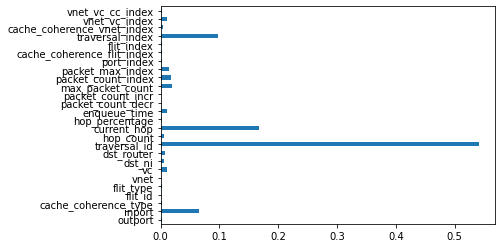

In [195]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

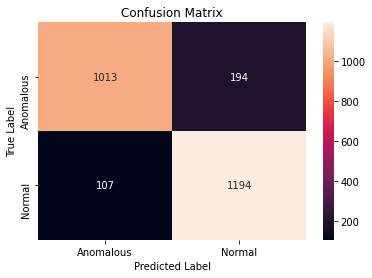

In [196]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [197]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1207
           1       0.86      0.92      0.89      1301

    accuracy                           0.88      2508
   macro avg       0.88      0.88      0.88      2508
weighted avg       0.88      0.88      0.88      2508



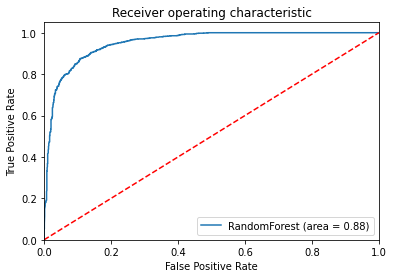

In [198]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250,500],
#           'min_child_weight':[1,3,6]}
#xgb_g=XGBClassifier(random_state=42)
#xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
#xgb_cv.fit(X_train,y_train)

#print("Best parameters:",xgb_cv.best_params_)
#print("Accuracy :",xgb_cv.best_score_)

In [201]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [203]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.8005783228637
Test Prediction Score 95.17543859649122


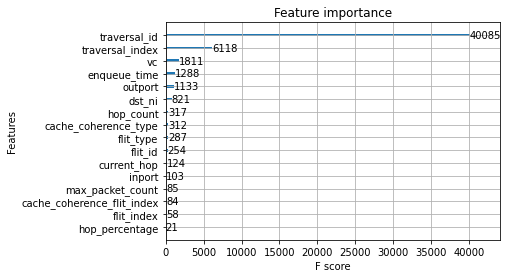

In [204]:
plot_importance(xgbc)
plt.show()

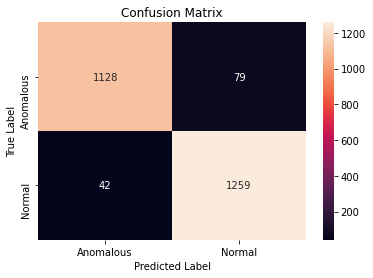

In [205]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [206]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1207
           1       0.94      0.97      0.95      1301

    accuracy                           0.95      2508
   macro avg       0.95      0.95      0.95      2508
weighted avg       0.95      0.95      0.95      2508



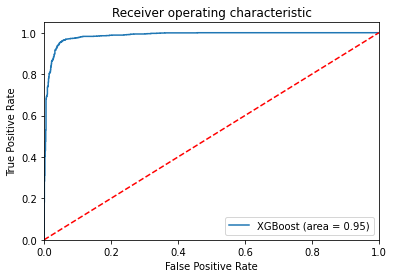

In [207]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
#param_grid = {'n_estimators': [x for x in range(24,40,2)],
#              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
#lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
#lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
#lgb_cv.fit(X_train, y_train)

#print("Best parameters:",lgb_cv.best_params_)
#print("Accuracy :",lgb_cv.best_score_)

In [210]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [212]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 89.39076677634858
Test Prediction Score 70.77352472089315


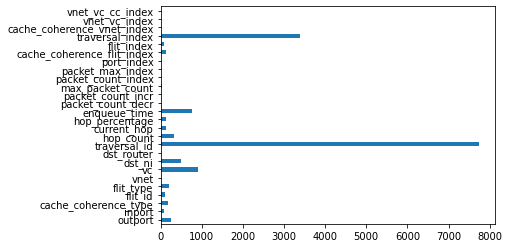

In [213]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

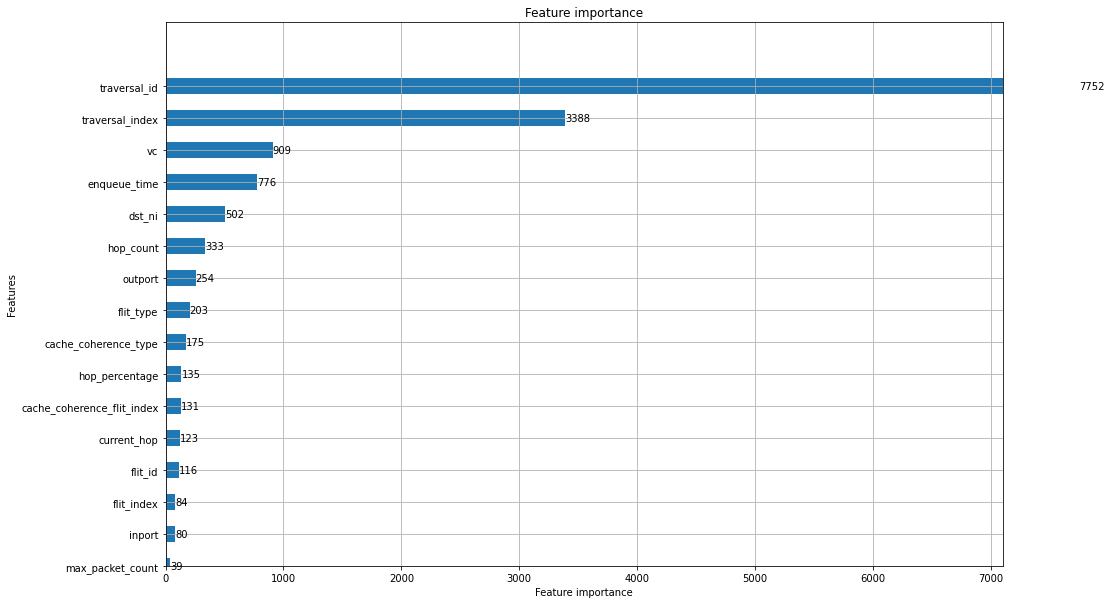

In [214]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,7100), ylim = (0,17), figsize = (15,10))
plt.show()

In [215]:
sorted(gbm.feature_importances_,reverse=True)

[7752,
 3388,
 909,
 776,
 502,
 333,
 254,
 203,
 175,
 135,
 131,
 123,
 116,
 84,
 80,
 39,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

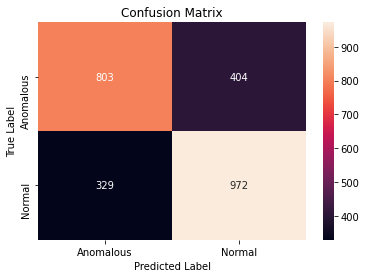

In [216]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [217]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1207
           1       0.71      0.75      0.73      1301

    accuracy                           0.71      2508
   macro avg       0.71      0.71      0.71      2508
weighted avg       0.71      0.71      0.71      2508



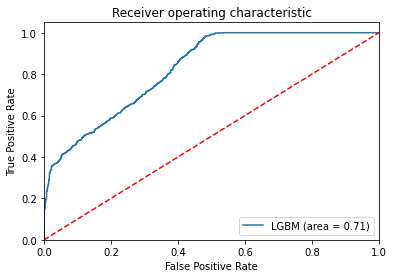

In [218]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()